
Q-5. Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data Dataset This is the Dataset You can use this dataset for this question.

In [2]:
import pandas as pd
import seaborn as sns
data = pd.read_csv(r"E:\DATA SETS\pokemon\rideshare_kaggle.csv")
sns.set(rc={"figure.figsize":(11,8)})
pd.pandas.set_option("display.max_columns",None)

In [3]:
data.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [5]:
import numpy as np
data["price"] = data["price"].fillna(np.nanmedian(data["price"]))

In [6]:
data.drop(["id","timestamp","product_id","datetime"],axis=1,inplace=True)

In [7]:
# saprate numwerical and catigorical frature
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['timezone', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')
Index(['hour', 'day', 'month', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1',
       'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemp

In [8]:
# use label encoding on catigorical data
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in catigorical_features:
    data[i] = lable.fit_transform(data[i])

In [9]:
correlation_matrix = data.corr().abs()

# Set the threshold for correlation value
threshold = 0.8

# Find highly correlated features
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] >= threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Remove the correlated features from the DataFrame
data = data.drop(correlated_features, axis=1)

# Print the remaining features
print("Selected Features:")
print(data.columns)

Selected Features:
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'short_summary', 'long_summary', 'precipIntensity',
       'humidity', 'windSpeed', 'windGustTime', 'visibility', 'temperatureLow',
       'icon', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMin'],
      dtype='object')


In [11]:
x = data.drop("price",axis=1)
y = data["price"]

In [12]:
# saprate numwerical and catigorical frature
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['hour', 'day', 'timezone', 'source', 'destination', 'cab_type', 'name',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipIntensity', 'humidity',
       'windSpeed', 'windGustTime', 'visibility', 'temperatureLow', 'icon',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'precipIntensityMax', 'temperatureMin'],
      dtype='object')


<AxesSubplot:>

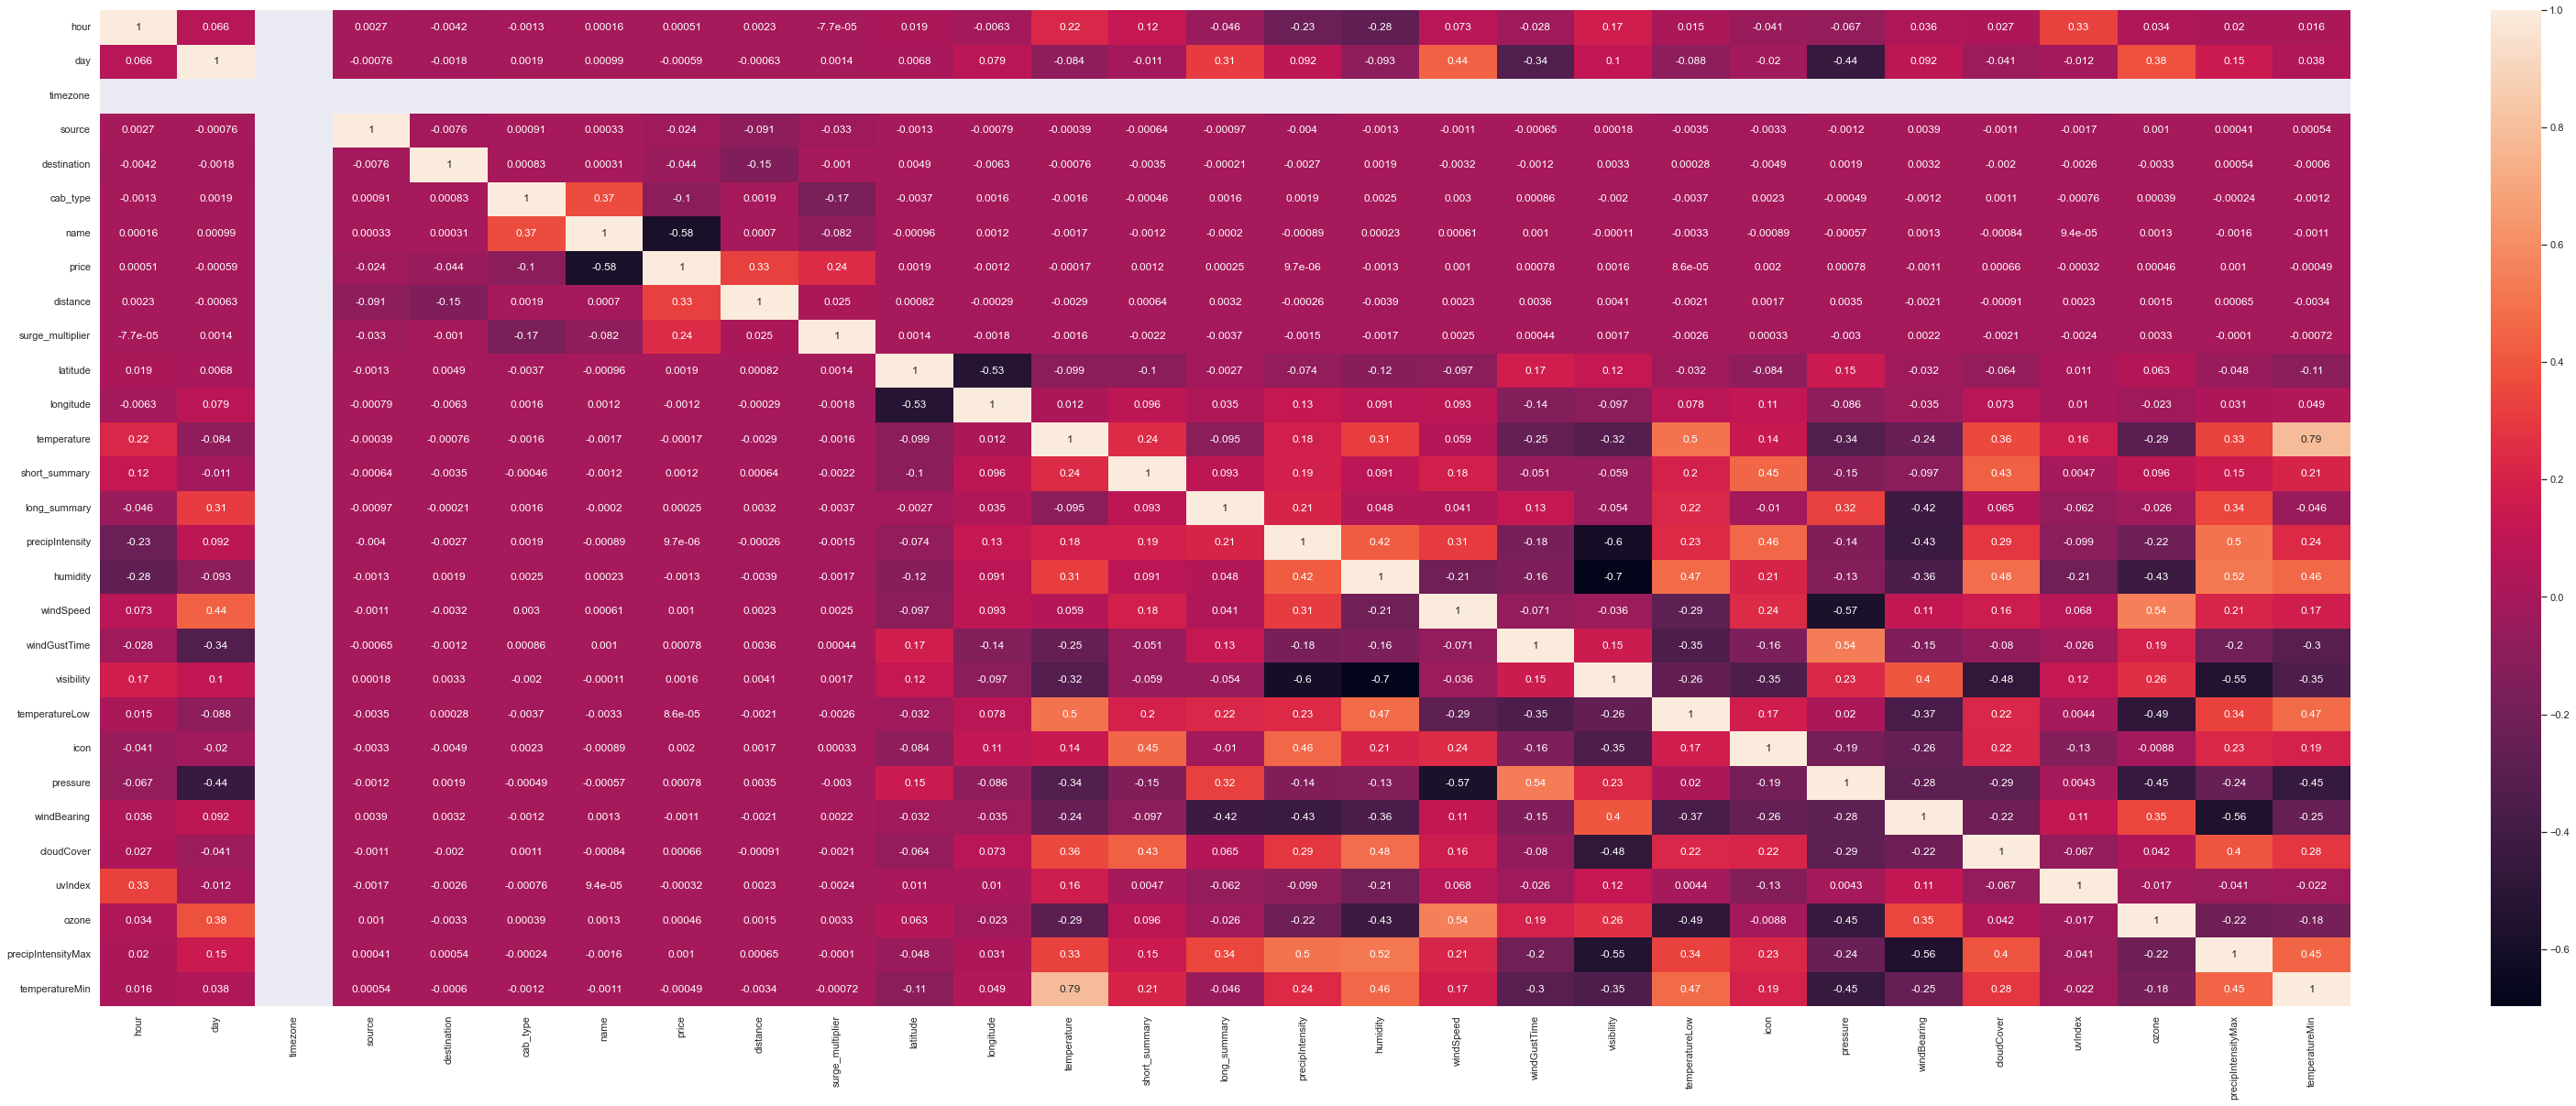

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(55,20))
sns.heatmap(data.corr(),annot=True)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Numerical Pipline
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]
)

# Create Preprocessor object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [16]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [17]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=300,max_depth=30,max_samples=10,max_leaf_nodes=8)
forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=30, max_leaf_nodes=8, max_samples=10,
                      n_estimators=300)

In [20]:
forest.score(X_train,y_train)

0.40295888652118483

In [21]:
y_pred = forest.predict(X_test)